<a href="https://colab.research.google.com/github/Elvicharde/Python-for-data-science/blob/master/Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning for IoRT Security of Robotic Control Systems** 

---
### Author: Elvicharde
### Description: This notebook provides a detailed analysis of the application of machine learning techniques to the security of control systems of Robotic devices in an IoRT network.
---

In [2]:
# Importing Relevant libraries
import time
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns 

%matplotlib inline

# Importing necessary scikitlearn packages
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
# importing the cleaned IoT-23 Dataset
csv_file_path = '/content/drive/MyDrive/Projects - Freelance/Colab Notebooks/Thierno Gueye/Code Files/IoT-23 Clean Dataset.csv'
with open (csv_file_path) as csv_dataset:
  dataset = pd.read_csv(csv_dataset)
  dataset.drop('Unnamed: 0', axis = 1, inplace=True)

In [4]:
# Converting all malicious data to a value of 1 and benign to 0
malicious = ['PartOfAHorizontalPortScan', 'Okiru', 'DDoS', 'C&C', 'Attack', 'C&C-HeartBeat', 'C&C-FileDownload',
             'C&C-Torii','FileDownload', 'C&C-HeartBeat-FileDownload', 'C&C-Mirai']

dataset['label'].replace(malicious, 1, inplace=True)    # Replacing all malicious traffic with a numeric 1
dataset['label'].replace('Benign', 0, inplace=True)     # Replacing all malicious traffic with a numeric 0

In [5]:
dataset['label'].value_counts()

1    1246865
0     199756
Name: label, dtype: int64

In [ ]:
# Creating the training and testing data for further use
from sklearn.model_selection import train_test_split

features = dataset.columns[dataset.columns != 'label']    # Extracting the dataset features
x = dataset[features]

y = dataset['label']    # output or target class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=100)


print(f"x_train: {x_train.shape[0]}  records\n x_test: {x_test.shape[0]} records"\
f"\ny_train: {y_train.shape[0]}  records\n y_test: {y_test.shape[0]} records")

x_train: 1012634  records
 x_test: 433987 records
y_train: 1012634  records
 y_test: 433987 records


---
# Machine Learning Models

A few Helper Functions for Training, Testing, and Evaluating the Models


In [ ]:
# creating training and prediction functions
def model_trainer(model, x_train, y_train):
    """ 
    This function trains a machine learning model.
    It accepts a three parameters: the model along with input features and target data 
    and returns the training summary.
    """
    train_start = time.time()    # clocking the start of the training session  
    model.fit(x_train, y_train)
    train_end = time.time()    # clocking the end of the training session
    train_duration = train_end - train_start
    return (model, train_duration) 

def predictor (trained_model, x_test):
    """ 
    This function trains a machine learning model.
    It accepts three parameters: the model along with input features and target data. 
    It returns the training summary
    """
    pred_start = time.time()    # clocking the start of the prediction session
    predictions = trained_model.predict(x_test)
    pred_end = time.time()    # clocking the end of the prediction session

    pred_duration = pred_end - pred_start
    return (predictions, pred_duration)     

def summary(model_name = None, y_test = y_test, **kwargs):
    """
    This function descibes the training and predictions. This includes the score and duration
    """
    prediction = kwargs['prediction']
    pred_duration = kwargs['pred_duration']
    train_duration = kwargs['train_duration']
    

    # Flattening the confusion matrix for later computations
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel() 

    # Calculating other metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = (sensitivity + specificity) * 0.5
    precision = tp / (tp + fp)
    f1_score = 2 * (sensitivity * precision) / (sensitivity + precision)

    print(f"\t Training and Predictions Complete ({model_name})\n{'----'*15}"
          f"\n\nTraining session       : {train_duration:.2f}"
          f" seconds\nPrediction session     : {pred_duration:.2f} seconds\n\n")

    print(f"\t\t\tMetrics\n{'----'*14}\n\n(TP): {tp} \t(FP): {fp} \t(TN): {tn} \t(FN): {fn}\n\n"
          f"Accuracy(%)           : {accuracy * 100:.1f}\n"
          f"Sensitivity/Recall(%) : {sensitivity * 100:.1f}\n"
          f"Specificity(%)        : {specificity * 100:.1f}\n"
          f"Balanced Accuracy     : {balanced_accuracy:.2f}\nPrecision(%)      "
          f"    : {precision * 100:.1f}\nF1-Score              : {f1_score:.2f}")

def train_test_model (model, input_train_data = x_train, input_test_data = x_test, 
                      target_train_data = y_train, target_test_data = y_test):
    """
    This function runs the trainer, predictor, and model score summarizer. It returns a string of results
    """
    # training
    trained_model, train_duration = model_trainer(model, input_train_data, target_train_data)
    # predicting
    prediction, pred_duration = predictor(trained_model, input_test_data)

    # Simple model summary
    metrics = {'prediction':prediction, 'train_duration':train_duration, 'pred_duration':pred_duration}  
    return metrics 

 *

> ### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression    # importing the scikitlearn module

model_1 = LogisticRegression()   #instantiating the SVM classifier
model_name1 = 'Logistic-Reg'

metrics1 = train_test_model(model_1)    # running the train_test_function

In [ ]:
summary(model_name1, y_test, **metrics1)

	 Training and Predictions Complete (Logistic-Reg)
------------------------------------------------------------

Training session       : 19.44 seconds
Prediction session     : 0.08 seconds


			Metrics
--------------------------------------------------------

(TP): 373835 	(FP): 60152 	(TN): 0 	(FN): 0

Accuracy(%)           : 86.1
Sensitivity/Recall(%) : 100.0
Specificity(%)        : 0.0
Balanced Accuracy     : 0.50
Precision(%)          : 86.1
F1-Score              : 0.93


---
> ### KNN

In [ ]:
# First we standardize all features to adjust distance between points
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)

scaled_DF = pd.DataFrame(scaled_data, columns = x.columns)

# Doing a dataset split
x_train2, x_test2, y_train, y_test = train_test_split(scaled_DF, 
                        y, test_size = 0.3, random_state = 100)    # Creating training and testing features from scaled dataset

scaled_DF.head(2).iloc[:,0:10]    # Checking a few datapoints to verify scaling

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp
0,0.017211,-0.001592,-0.000922,-0.004937,-0.002421,-0.002657,-0.001531,-0.00095,-0.051225,0.205446
1,-0.006902,-0.001592,-0.000922,-0.004937,-0.002449,-0.002699,-0.001531,-0.00095,-0.051225,0.205446


In [ ]:
# Training
from sklearn.neighbors import KNeighborsClassifier as knn
model_name2 = 'KNN'
model_2 = knn(n_neighbors = 1) 

metrics2 =  train_test_model(model_2, x_train2, x_test2)    # running the train_test_function

In [ ]:
summary(model_name2, y_test, **metrics2)

	 Training and Predictions Complete (KNN)
------------------------------------------------------------

Training session       : 0.10 seconds
Prediction session     : 5280.08 seconds


			Metrics
--------------------------------------------------------

(TP): 371958 	(FP): 27839 	(TN): 32313 	(FN): 1877

Accuracy(%)           : 93.2
Sensitivity/Recall(%) : 99.5
Specificity(%)        : 53.7
Balanced Accuracy     : 0.77
Precision(%)          : 93.0
F1-Score              : 0.96


---
> ### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB as GNB

# Instantiating the model
model_name3 = 'Naive Bayes'
model_3 = GNB()    # Gaussian Naive Bayes model

metrics3 = train_test_model(model_3, x_train2, x_test2)    # running the train_test_function

In [ ]:
summary(model_name3, y_test, **metrics3)

	 Training and Predictions Complete (Naive Bayes)
------------------------------------------------------------

Training session       : 0.57 seconds
Prediction session     : 0.20 seconds


			Metrics
--------------------------------------------------------

(TP): 371444 	(FP): 41397 	(TN): 18755 	(FN): 2391

Accuracy(%)           : 89.9
Sensitivity/Recall(%) : 99.4
Specificity(%)        : 31.2
Balanced Accuracy     : 0.65
Precision(%)          : 90.0
F1-Score              : 0.94


---

> ### Proposed Models

 - #### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC

# Creating the Decision Trees Classifier
model_name4 = 'Decision Trees'
model_4 = DTC()

metrics4 = train_test_model(model_4)    # Running the training, testing, and scoring helper function

In [ ]:
summary(model_name4, y_test, **metrics4)

	 Training and Predictions Complete (Decision Trees)
------------------------------------------------------------

Training session       : 7.15 seconds
Prediction session     : 0.19 seconds


			Metrics
--------------------------------------------------------

(TP): 368616 	(FP): 59326 	(TN): 826 	(FN): 5219

Accuracy(%)           : 85.1
Sensitivity/Recall(%) : 98.6
Specificity(%)        : 1.4
Balanced Accuracy     : 0.50
Precision(%)          : 86.1
F1-Score              : 0.92


---
- #### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

# Creating the RandomForest Classifier with 'n' estimators. 
# n is the number of devices or system in the adopted IoRT network, each running a Decision Tree estimator for voting
no_of_devices = [2, 5, 10, 50]

# Using the grid search function to decide on the best number of estimators from sample
parameters = {'n_estimators': no_of_devices}

grid = GridSearchCV(RFC(), parameters, cv = 2, verbose = 3)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ....................n_estimators=2;, score=0.848 total time=   1.9s
[CV 2/2] END ....................n_estimators=2;, score=0.848 total time=   2.1s
[CV 1/2] END ....................n_estimators=5;, score=0.853 total time=   4.2s
[CV 2/2] END ....................n_estimators=5;, score=0.853 total time=   5.0s
[CV 1/2] END ...................n_estimators=10;, score=0.853 total time=   8.4s
[CV 2/2] END ...................n_estimators=10;, score=0.853 total time=   9.0s
[CV 1/2] END ...................n_estimators=50;, score=0.854 total time=  44.4s
[CV 2/2] END ...................n_estimators=50;, score=0.854 total time=  46.0s


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [2, 5, 10, 50]}, verbose=3)

In [ ]:
# Running 
model_name5 = 'Random Forest'
model_5 = RFC(n_estimators = 50)

metrics5 = train_test_model(model_5)    # Running the training, testing, and scoring helper function

In [ ]:
summary(model_name5, y_test, **metrics5)

	 Training and Predictions Complete (Random Forest)
------------------------------------------------------------

Training session       : 122.14 seconds
Prediction session     : 5.82 seconds


			Metrics
--------------------------------------------------------

(TP): 370635 	(FP): 59648 	(TN): 504 	(FN): 3200

Accuracy(%)           : 85.5
Sensitivity/Recall(%) : 99.1
Specificity(%)        : 0.8
Balanced Accuracy     : 0.50
Precision(%)          : 86.1
F1-Score              : 0.92


---
- #### Deep Learning Network (ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Creating the MLP Classifier
model6_name = 'Deep-MLP'

model6 = MLPClassifier(activation = 'logistic', max_iter = 1000, alpha = 0.01, random_state = 20, shuffle = True)

metrics_6 = train_test_model(model6)    # Running the training, testing, and scoring helper function

In [ ]:
summary(model6_name, y_test, **metrics_6)

	 Training and Predictions Complete (Deep-MLP)
------------------------------------------------------------

Training session       : 870.31 seconds
Prediction session     : 1.20 seconds


			Metrics
--------------------------------------------------------

(TP): 371810 	(FP): 26529 	(TN): 33623 	(FN): 2025

Accuracy(%)           : 93.4
Sensitivity/Recall(%) : 99.5
Specificity(%)        : 55.9
Balanced Accuracy     : 0.78
Precision(%)          : 93.3
F1-Score              : 0.96


In [ ]:
# Bagging Classifier - Decision Trees ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier as DTC

# Creating the Decision Trees Classifier
dt_model = DTC(max_depth = 20)
bag_model = BaggingClassifier(dt_model, max_samples = 0.8)

# running a grid search CV to check importance of increasing devices
no_of_devices = [2, 5, 10, 15]

parameters = {'n_estimators': no_of_devices}

grid = GridSearchCV(bag_model, parameters, cv = 2, verbose = 3)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ....................n_estimators=2;, score=0.935 total time=   2.4s
[CV 2/2] END ....................n_estimators=2;, score=0.935 total time=   1.6s
[CV 1/2] END ....................n_estimators=5;, score=0.936 total time=   3.6s
[CV 2/2] END ....................n_estimators=5;, score=0.935 total time=   3.6s
[CV 1/2] END ...................n_estimators=10;, score=0.936 total time=   6.9s
[CV 2/2] END ...................n_estimators=10;, score=0.936 total time=   6.9s
[CV 1/2] END ...................n_estimators=15;, score=0.936 total time=  10.0s
[CV 2/2] END ...................n_estimators=15;, score=0.936 total time=  10.3s


GridSearchCV(cv=2,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20),
                                         max_samples=0.8),
             param_grid={'n_estimators': [2, 5, 10, 15]}, verbose=3)

In [ ]:
model7_name = 'Bagging D-Trees'
model_7 = BaggingClassifier(dt_model, n_estimators = 10, max_samples = 0.8)

metrics_7 = train_test_model(model_7)    # Running the training, testing, and scoring helper function

In [ ]:
summary(model7_name, y_test, **metrics_7)

	 Training and Predictions Complete (Bagging D-Trees)
------------------------------------------------------------

Training session       : 15.64 seconds
Prediction session     : 1.11 seconds


			Metrics
--------------------------------------------------------

(TP): 372258 	(FP): 26548 	(TN): 33604 	(FN): 1577

Accuracy(%)           : 93.5
Sensitivity/Recall(%) : 99.6
Specificity(%)        : 55.9
Balanced Accuracy     : 0.78
Precision(%)          : 93.3
F1-Score              : 0.96


# Visualizations and Post analysis


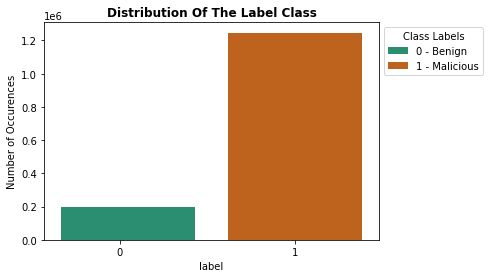

<Figure size 1000x700 with 0 Axes>

In [ ]:
# Visualizing various parts of the dataset
import seaborn as sns

# Checking the number of occurence
fig = sns.countplot(x = 'label', data = dataset, hue = 'label', dodge = False, palette = 'Dark2')

fig.set_xticks([-0.05, 1])
fig.set_ylabel('Number of Occurences')
fig.set_title('Distribution Of The Label Class', fontweight = 'bold')
fig.legend(['0 - Benign', '1 - Malicious'], title = 'Class Labels', loc = 2, bbox_to_anchor = (1,1))

figure1 = plt.figure(figsize = (5,3.5), dpi = 200)
plt.show()

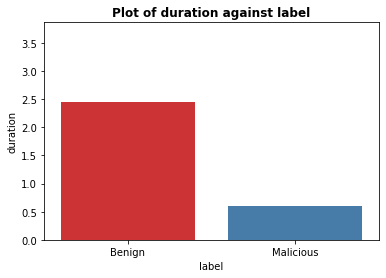

<Figure size 1000x700 with 0 Axes>

In [ ]:
fig = sns.barplot(x = 'label', y = 'duration', data = dataset, errwidth = 0, palette = 'Set1')

fig.set_xticklabels(['Benign', 'Malicious'])
fig.set_title('Plot of duration against label', fontweight = 'bold')
figure1 = plt.figure(figsize = (5,3.5), dpi = 200)

plt.show()

In [23]:
# Confusion Matrix from values

def confusion_matrix_plot(data, model_name, palette = None):
    """ This function takes in values for True Positives (TP), True Negatives (TN),
    False Positives (FP), False Negatives (FN), and prints a corresponding confusion matrix
    using seaborn heatmap 

    - array is 2-dimensional and must be passed in order: [TN, FP, FN, TP]   
    """
    array = [[data[0], data[1]], [data[2], data[3]]]
    title = f'Confusion Matrix for {model_name}'

    # Describing plot fonts
    font1 = {'color':'black','size':16, 'weight': 'bold'}
    font2 = {'family':'serif','color':'darkred','size':14}


    confusion_matrix = pd.DataFrame(array)

    # plotting the matrix
    fig = sns.heatmap(confusion_matrix, annot = True, cmap = palette, fmt="d", linewidths=1.5)

    fig.set_xlabel("Predicted", fontdict = font2)
    fig.set_ylabel("Actual", fontdict = font2)
    fig.set_title(title, fontdict = font1)

    fig.set_xticklabels(['Benign', 'Malicious'])
    fig.set_yticklabels(['Benign', 'Malicious'])




    plt.figure(figsize = (3,2))

    return plt.show()

#### Classifier Plots

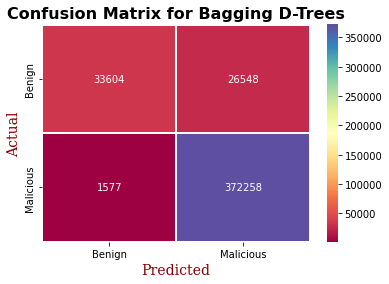

<Figure size 216x144 with 0 Axes>

In [36]:
# confusion matrix for Bagging D-Trees
TP = 372258; FP = 26548; TN = 33604; FN = 1577

data = [TN, FP, FN, TP]
model = 'Bagging D-Trees'

confusion_matrix_plot(data, model, 'Spectral')


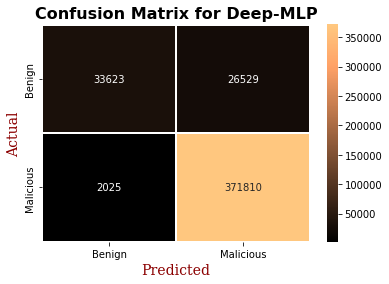

<Figure size 216x144 with 0 Axes>

In [53]:
# confusion matrix for Deep-MLP
TP = 371810; FP = 26529; TN = 33623; FN = 2025

data = [TN, FP, FN, TP]
model = 'Deep-MLP'

confusion_matrix_plot(data, model, 'copper')

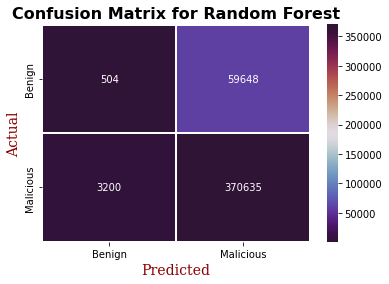

<Figure size 216x144 with 0 Axes>

In [61]:
# confusion matrix for Random Forest
TP = 370635; FP = 59648; TN = 504; FN = 3200

data = [TN, FP, FN, TP]
model = 'Random Forest'

confusion_matrix_plot(data, model, 'twilight_shifted')

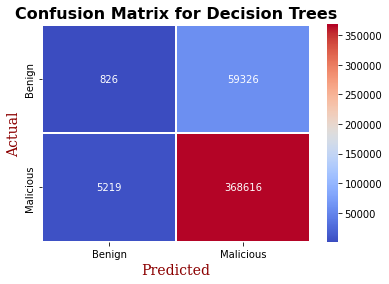

<Figure size 216x144 with 0 Axes>

In [62]:
# confusion matrix for Decision Trees
TP = 368616; FP = 59326; TN = 826; FN = 5219

data = [TN, FP, FN, TP]
model = 'Decision Trees'

confusion_matrix_plot(data, model, 'coolwarm')

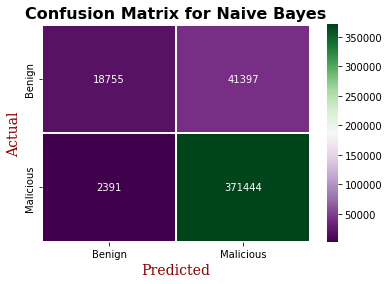

<Figure size 216x144 with 0 Axes>

In [64]:
# confusion matrix for Naive Bayes
TP = 371444; FP = 41397; TN = 18755; FN = 2391

data = [TN, FP, FN, TP]
model = 'Naive Bayes'

confusion_matrix_plot(data, model, 'PRGn')

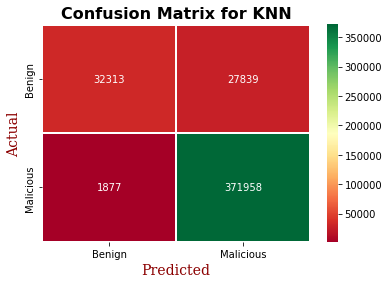

<Figure size 216x144 with 0 Axes>

In [65]:
# confusion matrix for KNN
TP = 371958; FP = 27839; TN = 32313; FN = 1877

data = [TN, FP, FN, TP]
model = 'KNN'

confusion_matrix_plot(data, model, 'RdYlGn')

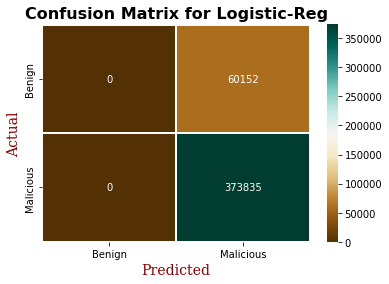

<Figure size 216x144 with 0 Axes>

In [66]:
# confusion matrix for Logistic-Reg
TP = 373835; FP = 60152; TN = 0; FN = 0

data = [TN, FP, FN, TP]
model = 'Logistic-Reg'

confusion_matrix_plot(data, model, 'BrBG')

### END